In [92]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
# exp_id = "aug_ratio_nosharing_ratioed-"
# exp_id = "aug_ratio_nosharing-"
exp_id = "180401-train/aug_ratio_nosharing_ratioed-"
# exp_id = "180430-repro-train/aug_ratio_nosharing_ratioed-"
results, saved = pickle.load(open('../output/streamer/scheduler/18Q2/' + exp_id + 'fairness_results.pkl'))

In [94]:
# print(saved)
table = []
for entry in saved:
    run_id = entry[0]
    run_id = run_id.split("-")[1:]
    scheduler = run_id[-2]
    budget = int(run_id[-1][1:])
    num_apps = entry[1]
#     entry[2] = [1 - x for x in entry[2]]
    row = [scheduler, num_apps, budget] + entry[2:6] + entry[-2:] 
#     print(row)
    table.append(row)
df = pd.DataFrame(table, columns=['scheduler', 'num_apps', 'budget', 'f1s', 'costs', 'objectives', 'configs', 'app_stats', 'total_cost'])    
# df.apply(lambda r: r['objectives'], r['f1s'])
#     print run_id, budge
#     saved = {}
#     for at, l in zip(att, lines):
#         print l
#         saved[l['num_apps']] = {
#             'sharing': l['sharing'],
#             'fps': l['fps'],
#         }

In [95]:
for x in ['f1', 'objective']:
    df[x+'_min'] = df[x+'s'].apply(min)
    df[x+'_max'] = df[x+'s'].apply(max)
    df[x+'_avg'] = df[x+'s'].apply(lambda xx: sum(xx)/len(xx))
    df[x+'_std'] = df[x+'s'].apply(np.std)

In [96]:
# df[['scheduler', 'num_apps', 'budget', 'f1_min', 'f1_avg', 'f1_std', 'f1_max', 'f1s', 'configs']].index(df['budget'] == 75)

In [97]:
df[['scheduler', 'num_apps', 'budget', 'f1_min', 'f1_avg', 'f1_std', 'f1_max', 'f1s', 'objective_min', 'objective_avg', 'objective_std', 'objective_max', 'objectives']]

,scheduler,num_apps,budget,f1_min,f1_avg,f1_std,f1_max,f1s,objective_min,objective_avg,objective_std,objective_max,objectives
0,maxmin,4,100,0.141846,0.474554,0.198017,0.663107,"[0.536504111143, 0.141845921838, 0.55676022488...",0.369227,0.565817,0.206782,0.913382,"[0.500075128283, 0.913381640829, 0.48058316006..."
1,maxmin,8,100,0.141846,0.277932,0.096275,0.355539,"[0.179805998791, 0.141845921838, 0.35553890813...",0.657781,0.737294,0.098123,0.876479,"[0.836018713503, 0.876479467226, 0.65778055792..."
2,maxmin,12,100,0.128499,0.321977,0.115494,0.437494,"[0.352908212109, 0.128499273675, 0.36824499893...",0.568262,0.684490,0.116779,0.880306,"[0.652618007238, 0.880305631195, 0.63753796001..."
3,maxmin,16,100,0.128499,0.296655,0.112018,0.421738,"[0.352908212109, 0.128499273675, 0.37726867442...",0.581584,0.707139,0.112746,0.876568,"[0.650195856306, 0.876567902169, 0.62593389631..."
4,maxmin,4,125,0.149010,0.609804,0.274097,0.871011,"[0.705208236281, 0.149009542677, 0.71398887137...",0.148863,0.432013,0.292881,0.923208,"[0.331770451057, 0.923208121188, 0.32420998969..."
5,maxmin,8,125,0.149010,0.365144,0.148008,0.535129,"[0.53512881944, 0.149009542677, 0.438733533626...",0.478944,0.655419,0.152071,0.877743,"[0.478943833189, 0.87774324939, 0.579455497905..."
6,maxmin,12,125,0.141846,0.466401,0.191938,0.641896,"[0.53512881944, 0.141845921838, 0.541719158833...",0.363846,0.541503,0.194957,0.871319,"[0.471085770837, 0.871318857064, 0.46484577389..."
7,maxmin,16,125,0.141846,0.363495,0.156690,0.641896,"[0.53512881944, 0.141845921838, 0.355538908137...",0.361323,0.641890,0.158264,0.865822,"[0.468359095521, 0.865822173769, 0.64964425696..."
8,maxmin,4,150,0.149010,0.669893,0.309786,0.964425,"[0.792616122246, 0.149009542677, 0.77352221463...",0.043741,0.374635,0.337139,0.938325,"[0.24565114442, 0.938324987598, 0.27082303258,..."
9,maxmin,8,150,0.149010,0.609298,0.273922,0.871011,"[0.703183883625, 0.149009542677, 0.71398887137...",0.135811,0.408005,0.285013,0.886972,"[0.309821061763, 0.886971952143, 0.29941603158..."


In [98]:
gff = df[['scheduler', 'num_apps', 'budget', 'objective_min', 'objective_avg', 'objective_std', 'objective_max', 'objectives']]
aa = gff[(gff['num_apps'] == 8) & (gff['budget'] == 50)]
for bb in aa['objectives']:
    print ','.join(map('{:g}'.format, bb))
aa

0.825062,0.914404,0.866639,0.900528,0.825062,0.914404,0.866639,0.900528
0.825062,0.918705,0.807751,0.791515,0.825062,0.918705,0.811853,0.791515
0.825062,0.918131,0.811853,0.791515,0.825062,0.918705,0.811853,0.791515


,scheduler,num_apps,budget,objective_min,objective_avg,objective_std,objective_max,objectives
24,maxmin,8,50,0.825062,0.876658,0.034486,0.914404,"[0.82506157403, 0.914404028012, 0.866639256491..."
53,avg,8,50,0.791515,0.836271,0.049064,0.918705,"[0.82506157403, 0.918705258773, 0.807751456134..."
85,greedy,8,50,0.791515,0.836712,0.048663,0.918705,"[0.82506157403, 0.918130925423, 0.811852741811..."


In [99]:
df[df['f1_min'] < 0][['budget', 'num_apps', 'scheduler']]

,budget,num_apps,scheduler


In [107]:
for a, b in df.groupby('num_apps'):
    dd = b.pivot(index='budget', columns='scheduler', values='objective_avg')
    offenders = dd.index[dd['avg'] > dd['greedy']].tolist()
    gg = df[(df['num_apps'] == a) & (df['budget'].isin(offenders)) & (df['scheduler'].isin(['greedy', 'avg']))][['scheduler', 'budget', 'f1_avg', 'objective_avg', 'total_cost', 'configs', 'f1s']]
    if len(offenders) != 0:
        print gg.sort_values('budget')
        print 'Bad A:', a, dd[dd['avg'] > dd['greedy']]
    assert len(offenders) == 0

# print 
for a, b in df.groupby('num_apps'):
    dd = b.pivot(index='budget', columns='scheduler', values='objective_max')
    offenders = dd[dd['avg'] < dd['maxmin']]
    if len(offenders) > 0:
        print 'Bad B', a, offenders
    assert len(offenders) == 0

In [101]:
dff = df[['scheduler', 'num_apps', 'budget', 'f1_min', 'f1_avg', 'f1_std', 'f1_max']]

In [102]:
# dff

In [103]:
# # legend/lines: type
# # y: f1_min/f1_mean/f1_std
# # x: budget, fix num_apps
# from matplotlib import colors
# import sys
# sys.path.append('../scripts/util')
# from plot_util import COLORLISTS
# params = dict() #lw=3, ms=8, alpha=0.7, linestyle='--')
# colorlist = COLORLISTS[8]
# for a, b in dff.groupby('num_apps'):
#     ax = None
#     fig, ax1 = plt.subplots()
#     ax2 = ax1.twinx()
#     for i, (c, d) in enumerate(b.groupby('scheduler')):
#         d = d.sort_values('budget', ascending=False)
# #         print(d)
#         d.plot(y='f1_min', x='budget', kind='scatter',ax=ax1, color=colorlist[i*2], label=c, marker='*', **params)
#         d.plot(y='f1_avg', x='budget', kind='scatter',ax=ax2, color=colorlist[i*2+1], label=c, marker='+', **params)   
#     ax1.legend(loc=3)
#     plt.title('Num apps: '+str(a))
#     ax2.legend(loc=1)
#     fig.savefig("../plots/scheduler/fairness/{}maxmin_numapps-{}-d.pdf".format(exp_id, a))

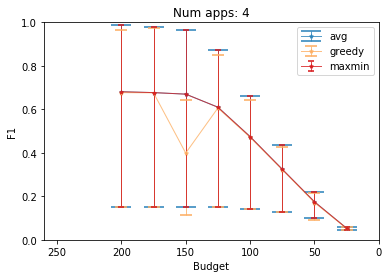

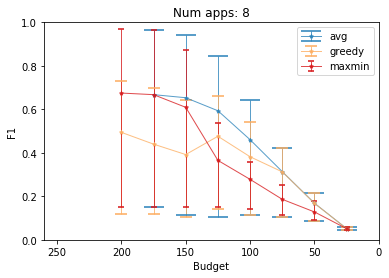

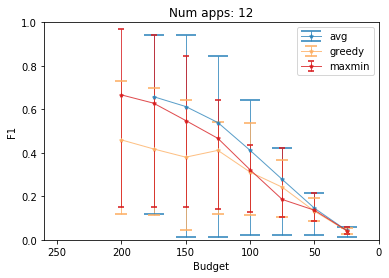

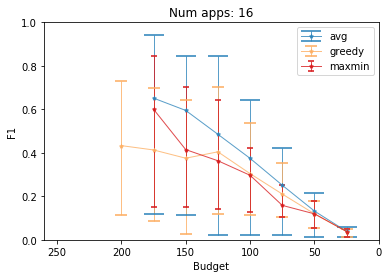

In [104]:
# legend/lines: type
# y: f1_min/f1_mean/f1_std
# x: budget, fix num_apps
from matplotlib import colors
import sys
sys.path.append('../scripts/util')
from plot_util import COLORLISTS
from plot_util import COLORS
params = dict(lw=1, ms=4, alpha=0.78, capthick=2) # linestyle='--') capsize=5, 
colorlist = [COLORS['blue'], COLORS['orange'], COLORS['red']]

cap = [10, 6, 3]
for a, b in dff.groupby('num_apps'):
    ax = None
    fig, ax1 = plt.subplots()
#     ax2 = ax1.twinx()
    
    for i, (c, d) in enumerate(b.groupby('scheduler')):
        d = d.sort_values('budget')
        errs = [np.array(d['f1_avg'] - d['f1_min']), np.array(d['f1_max'] - d['f1_avg'])]
#         errs = [errs[0], np.zeros(errs[0].shape)]
        ax1.errorbar(d['budget'], d['f1_avg'], yerr=errs, color=colorlist[i], label=c, marker='*', capsize=cap[i], **params)
#         d.plot(y='f1_min', x='budget', kind='scatter',ax=ax1, color=colorlist[i*2], label=c, marker='*', **params)
#         d.plot(y='f1_avg', x='budget', kind='scatter',ax=ax2, color=colorlist[i*2+1], label=c, marker='+', **params)   
    ax1.legend()
#     ax2.legend(loc=1)
    plt.title('Num apps: '+str(a))
    plt.ylim(0, 1)
    plt.ylabel('F1')
    plt.xlim(260, 0)
    plt.xlabel('Budget')
    fig.savefig("../plots/scheduler/fairness/{}maxmin_numapps-{}.pdf".format(exp_id, a))
    fig.savefig("../plots/scheduler/fairness/{}maxmin_numapps-{}.png".format(exp_id, a), dpi=600)

In [105]:
dff = df[['scheduler', 'num_apps', 'budget', 'objective_min', 'objective_avg', 'objective_std', 'objective_max']]

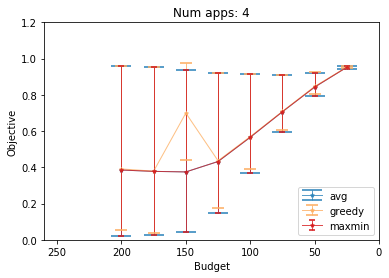

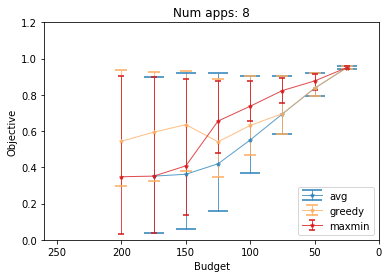

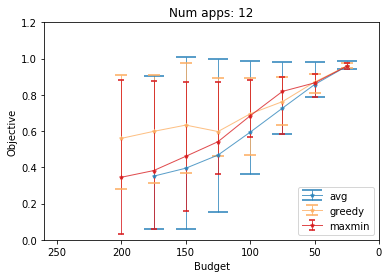

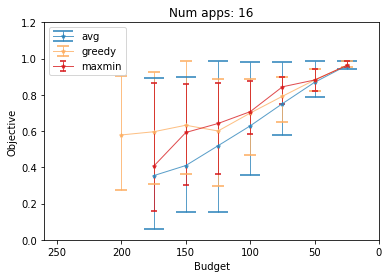

In [106]:
dff = df[['scheduler', 'num_apps', 'budget', 'objective_min', 'objective_avg', 'objective_std', 'objective_max']]
# legend/lines: type
# y: f1_min/f1_mean/f1_std
# x: budget, fix num_apps
from matplotlib import colors
import sys
sys.path.append('../scripts/util')
from plot_util import COLORLISTS
from plot_util import COLORS
params = dict(lw=1, ms=4, alpha=0.78, capthick=2) # linestyle='--') capsize=5, 
colorlist = [COLORS['blue'], COLORS['orange'], COLORS['red']]

cap = [10, 6, 3]
for a, b in dff.groupby('num_apps'):
    ax = None
    fig, ax1 = plt.subplots()
#     ax2 = ax1.twinx()
    
    for i, (c, d) in enumerate(b.groupby('scheduler')):
        d = d.sort_values('budget')
        errs = [np.array(d['objective_avg'] - d['objective_min']), np.array(d['objective_max'] - d['objective_avg'])]
#         errs = [errs[0], np.zeros(errs[0].shape)]
        ax1.errorbar(d['budget'], d['objective_avg'], yerr=errs, color=colorlist[i], label=c, marker='*', capsize=cap[i], **params)
#         d.plot(y='f1_min', x='budget', kind='scatter',ax=ax1, color=colorlist[i*2], label=c, marker='*', **params)
#         d.plot(y='f1_avg', x='budget', kind='scatter',ax=ax2, color=colorlist[i*2+1], label=c, marker='+', **params)   
    ax1.legend()
#     ax2.legend(loc=1)
    plt.title('Num apps: '+str(a))
    plt.ylim(0, 1.2)
    plt.ylabel('Objective')
    plt.xlim(260, 0)
    plt.xlabel('Budget')
    fig.savefig("../plots/scheduler/fairness/{}maxmin_numapps-{}-obj.pdf".format(exp_id, a))
    fig.savefig("../plots/scheduler/fairness/{}maxmin_numapps-{}-obj.png".format(exp_id, a), dpi=600)